In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/ushape.csv')

In [3]:
df.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


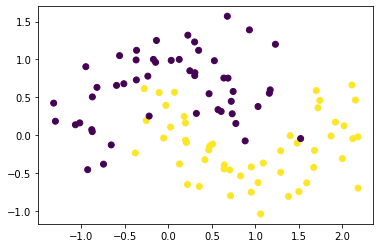

In [4]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [5]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()

model.add(Dense(2,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Set parameters to 0
model.get_weights()

[array([[-0.6688036 , -0.2795139 ],
        [ 0.51769984,  0.04662955]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.7076749 ],
        [-0.05407917]], dtype=float32),
 array([0.], dtype=float32)]

In [9]:
initial_weights = model.get_weights()

In [10]:
initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5

In [11]:
model.set_weights(initial_weights)

In [12]:
model.get_weights()

[array([[0.5, 0.5],
        [0.5, 0.5]], dtype=float32),
 array([0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 103ms/step - loss: 0.8635 - accuracy: 0.5000 - val_loss: 0.8362 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 17ms/step - loss: 0.8611 - accuracy: 0.5000 - val_loss: 0.8341 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 20ms/step - loss: 0.8588 - accuracy: 0.5000 - val_loss: 0.8320 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 14ms/step - loss: 0.8568 - accuracy: 0.5000 - val_loss: 0.8300 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 14ms/step - loss: 0.8547 - accuracy: 0.5000 - val_loss: 0.8280 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 14ms/step - loss: 0.8526 - accuracy: 0.5000 - val_loss: 0.8260 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 15ms/step - loss: 0.8506 - accuracy: 0.5000 - val_loss: 0.8240 - val_accuracy: 0.5000
Epoch 8/100
3/3 [==

In [15]:
model.get_weights()

[array([[0.6955523, 0.6955523],
        [0.2455837, 0.2455837]], dtype=float32),
 array([0.27907482, 0.27907482], dtype=float32),
 array([[0.26958537],
        [0.26958537]], dtype=float32),
 array([0.2563197], dtype=float32)]

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

3888/3888 [==============================] - 5s 1ms/step
